### Week 11: Network Analysis

Instructor: Cornelia Ilin <br>
Email: cilin@ischool.berkeley.edu <br>


**Citations (online sources):**
1. Intro to GIS with Python
    - https://automating-gis-processes.github.io/site/2018/course-info/course-info.html


2. Retrieve data from Open Street Maps (OSM) with the OSMnx package    
    - https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=gdf#submodules


3. Calculating distance in km (or miles) between two points
    - https://geopy.readthedocs.io/en/stable/
   
    
4. Geographical location of airports in Nairobi, Kenya
    - https://en.wikipedia.org/wiki/Wilson_Airport
    - https://en.wikipedia.org/wiki/Jomo_Kenyatta_International_Airport
    - https://en.wikipedia.org/wiki/Moi_Air_Base


5. Geographical location of power plants in Kenya
    - https://en.wikipedia.org/wiki/List_of_power_stations_in_Kenya 

 
6. Conversion tool of geographical location (convert from "Degrees, Minutes, Seconds" to "Decimal degrees")
    - https://www.vercalendario.info/en/how/convert-latitude-longitude-degrees-decimals.html

7. Open Street Maps (OSM)
    - https://en.wikipedia.org/wiki/OpenStreetMap
    - https://www.openstreetmap.us/
    
8. Intro to Netowrk Analysis:
    - https://www.amazon.com/Network-Science-Python-NetworkX-Quick/dp/1789955319

### Objectives: 

Main idea: Learn how to use the OSMnx Python package to extract spatial data for any location in the world (so we need a bit of Network Analysis and Geospatial knowledge). Then use this data to build the feature vector for an ML model. The description of the main objectives is as follows:
 - GIS with Python
 - Open Street Maps (OSM) data
 - Network Analysis
 - Putting the pieces together: my own research project and connection with ML
 
Secondary idea: Maybe you can come up with a Capstone project using this data? Think about impact using free resources.

---
### GIS with Python:

 - Python is extremely useful when it comes to spatial (GIS) analysis!
 - Many GIS Software companies (such as ArcGIS, QGIS, PostGIS etc.) provide an interface to do analysis using Python scripting. 
 - I recommend learning how to do GIS with Python without any third party softwares (such as ArcGIS). 
 - Why? Python is free! and you can learn and understand much more deeply how different geoprocessing operations work (ArcGIS, QGIS, PostGIS etc. provide a GUI, so you don't really know what's going on under the hood).
 - Lots of (very powerful) GIS related libraries in Python:
     - GDAL
     - Geopandas
     - Shapely
     - Fiona
     - Pyproj
     - Pysal
     - Geopy
     - Contextily
     - GeoViews
     - Geoplot
     - Dash
     - OSMnx
     - Networkx
     - Cartopy
     - Scipy.spatial
     - Rtree
     - Rasterio
     - RSGISLib
     
Check here for a description of these libraries:
 - https://automating-gis-processes.github.io/site/2018/lessons/L1/Intro-Python-GIS.html#why-python-for-gis


---
### Open Street Maps (OSM) data
- Similar to Google Maps.
- The creation and growth of OSM has been motivated by restrictions on use or availability of map data across much of the world, and the advent of inexpensive portable satellite navigation devices (hint: try to get free spatial data from Google Maps :)
- Prominent users of OSM include Facebook, Craigslist, Seznam, OsmAnd, Geocaching, MapQuest Open, JMP statistical software, and Foursquare. 

How is it created:
   - OSM data is collected from scratch by volunteers performing systematic ground surveys using tools such as a handheld GPS unit, a notebook, digital camera, or a voice recorder. The data is then entered into the OpenStreetMap database. Mapathon competition events are also held by OpenStreetMap team and by non-profit organisations and local governments to map a particular area.

   - The availability of aerial photography and other data from commercial and government sources has added important sources of data for manual editing and automated imports. Special processes are in place to handle automated imports and avoid legal and technical problems.
   
Check here for more information: 
- https://en.wikipedia.org/wiki/OpenStreetMap
- https://www.openstreetmap.us/ (you can become a contributor too!!)


---
### Network Analysis
- Multiple types of networks: social networks, flow networks, similarity networks, spatial networks.
- Big topic, imposible to cover it in a 90 min class; but I recommend this book for some introductory material: https://www.amazon.com/Network-Science-Python-NetworkX-Quick/dp/1789955319
- Today we will be focusing on spatial networks, in particular we will be using the OSMnx package in Python.
- OSMnx lets you download spatial geometries and model, project, visualize, and analyze real-world street networks from OpenStreetMap's APIs. Users can download and model walkable, drivable, or bikeable urban networks with a single line of Python code, and then easily analyze and visualize them. You can just as easily download and work with amenities/points of interest, building footprints, elevation data, street bearings/orientations, speed/travel time, and network routing.
- OSMnx is built on top of geopandas, networkx, and matplotlib and interacts with OpenStreetMap's APIs.

The guy who developed OSMnx got his PhD from UC Berkeley (OSMnx was part of his thesis): https://geoffboeing.com/2016/11/osmnx-python-street-networks/

Ok, a few concepts before we move on to play with the data:
- Nodes vs. Edges? 
- Types of graphs (edges)?
- Main Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks? (NetworkX)

Read more here: https://pynetwork.readthedocs.io/en/latest/networkx_basics.html


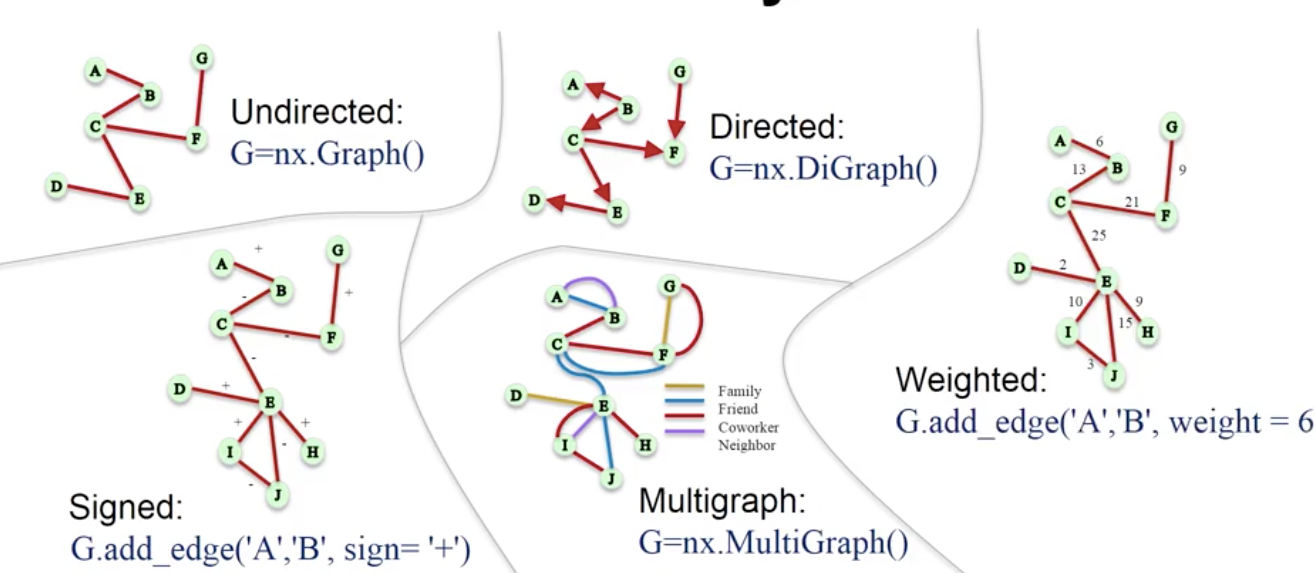

In [1]:
from IPython.display import Image
print('Read more here: https://pynetwork.readthedocs.io/en/latest/networkx_basics.html')
Image(filename='network_edges1.png', width=700)

--- 
### Putting the pieces together: 

``1. My research project (joint with Emilia Tjernstroem and others at UW-Madison):``

**Motivation**:
   - research on the health effects of air pollution in poor countries is scarce. 
   - main reason is data availability. Air pollutant monitoring and reporting is limited in developing countries.
   
**Question**:
   - The effects of air pollution on cognitive ability (as measured by national examination test scores in Nairobi, Kenya).
    
**Objectives**:
     
   - **Obj 1**: Obtain national examination test scores from the government of Nairobi (not too complicated, they trusted our research study).
     
   - **Obj 2**: Collect data on the location of key point sources of pollution (major roads, airports, industrial sites, and slums). 
   
   - **Obj 3**: Estimate the causal effect of being upwind from key pollution sources on national examination student performance, as a proxy for contemporaneous cognitive impacts. 
   
``2. Connection with ML: let's focus on Obj 2``:

   - What is the outcome variable?
   - What are the features?
   - What ML methods we can use to solve Obj 3?

### Step 1: Import packages

In [2]:
# general packages
import pandas as pd
import geopandas as gpd

# plotting related packages
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# GIS related packages
import osmnx as ox
from shapely.geometry import Point, LineString, Polygon
from geopy import distance

# ML related packages
from sklearn.feature_selection import VarianceThreshold

# others
import time

### Step 2: Define functions

In [3]:
def get_centroid(data):
    """A function that returns the centroid of the geometry column in a geodataframe
    #param data: geodataframe
    #return: the centroid of an edge (road) in Series form (the data type of the column is a tuple)
    """
    data_centroid_xy = []
    for point in data.centroid: #centroid is a method in geopandas
        temp_point = point.xy
        temp_x = temp_point[0][0] # extract first coordinate of temp_point
        temp_y = temp_point[1][0] # extract second coordinate of temp_point
        temp_tuple = (temp_x, temp_y)
        data_centroid_xy.append(temp_tuple)
    return pd.Series(data_centroid_xy)

In [4]:
def get_distance_to_school(schools_centroid_xy, others_centroid_xy):
    """A function that computes the distance between the centroid of a school and the centroid of an edge
    #The edge can be a road, airport, power network etc
    #param schools_centroid_xy: is Series data with school info
    #param others_centroid_xy: is Series data with edge info
    #return: a DataFrame with the distance (in km) from each school to an edge
    """ 

    distance_to_school = []

    school_count = 0
    start_time = time.time()

    print("Processing data...\n")
    for school_point in schools_centroid_xy:
        innerlist = []
        school_count += 1
        if school_count % 500 == 0:
            print("Distance computed for", school_count, "schools")
            print("Processing data...\n")
            
        for others_point in others_centroid_xy:     
            temp_distance = distance.distance(school_point, others_point).km
            innerlist.append(temp_distance)
        distance_to_school.append(innerlist)

    end_time = time.time()
    print("\nThe distance (in km) was computed for", school_count, "schools", end = ".\n")
    print("There are", schools_centroid_xy.shape[0], "schools in the data.")
    print("\nTime elapsed:", round(end_time - start_time, 3), "seconds.")
    
    return pd.DataFrame(distance_to_school)

In [5]:
def add_row_col_names(schools, edge, school_to_edge, edge_type):
    """ A function that adds school names to the dataframe obtained from get_distance_to_school() function (school_to_edge)
    #param1: schools is a GeoDataFrame with a column called "name" that indicates the name of school
    #param2: edge is a GeoDataFrame or List with edge information, such as "osmid", "name" etc
    #param3: school_to_edge is a DataFrame obtained from get_distance_to_school() function
    #param4: edge_type is a List that indicates the type of edge: 1 = road, 2 = airport, 3 = plant
    #return: school_to_edge DataFrame with rows and col names
    """
   
    # ADD COL NAMES
    if edge_type == 1:
        # retrive list of road osmids
        col_name = edge["osmid"].values.tolist()
        # transform list values to strings
        col_name_str = []
        for value in col_name:
            col_name_str.append("osmid_" + str(value)) 
    else:
        # retrieve list of airport names or power plant names
        col_name = edge

    # add col_names to dataframe
    if edge_type == 1:
        school_to_edge.columns = col_name_str
    elif edge_type == 2 or edge_type == 3:
        school_to_edge.columns = col_name
        
        
    # ADD ROW NAMES
    # retrive list of school names
    school_names = schools["name"].values.tolist()

    # add school_name to existing dataframe at index 0
    school_to_edge.insert(0, "school_name", school_names, True)
        
           
    return school_to_edge 

In [6]:
def stats_for_each_school(school_to_edge):
    """A function that computes statistics for each school
    #param: school_to_edge is a DataFrame obtained from get_distance_to_school() and add_row_col_names() functions
    #return: a DataFrame containing statistics for each school (describe by line)
    """
    # read all lines, all columns but for column at index == 0 (school_name)
    school_to_edge_temp = school_to_edge.iloc[:, 1:]

    # compute statistics for each school (describe by line)
    stats_each_school = school_to_edge_temp.apply(pd.DataFrame.describe, axis = 1)
    
    return stats_each_school

In [7]:
def stats_for_all_schools(stats_each_school):
    """A function that computes statistics for all schools
    #param stats_each_school: is a DataFrame containing statistics for each school (describe by line, derived from stats_for_each_school() function
    #return: a DataFrame containing statistics for all schools (describe by column)
    """
    stats_all_schools = stats_each_school.apply(pd.DataFrame.describe, axis = 0)
    
    return stats_all_schools

---
### Step 3: Extract spatial info on major roads 
---
(needed to build the feature matrix needed for Objective 2)

#### (A) Fetch the OSM street network for Nairobi, Kenya

Uses the OSMnx package in Python:

- **@module** osmnx.core <br>
- **@method** graph_from_place()
- **@param** network_type (options below):
        * drive: get drivable public streets (but not service roads)
        * drive_service: get drivable streets, including service roads
        * walk: get all streets and paths that pedestrians can use (this network type ignores one-way directionality)
        * bike: get all streets and paths that cyclists can use
        * all: download all non-private OSM streets and paths
        * all_private: download all OSM streets and paths, including private-access ones
- **@return** MultiDiGraph

In [8]:
place_name = "Nairobi, Kenya"
graph = ox.graph_from_place(place_name, network_type = "all_private")

Let's look at the type of the graph we just created.

In [9]:
print(type(graph))

<class 'networkx.classes.multidigraph.MultiDiGraph'>


A MultiDiGraph is a directed graph class that can store multiedges.

Multiedges are multiple edges between two nodes. Each edge can hold optional data or attributes. 

A MultiDiGraph holds directed edges. Self loops are allowed.

Examples?

#### (B) Plot the OSM street network for Nairobi, Kenya

Uses the OSMnx package in Python:
- **@module** osmnx.core <br> 
- **@method** plot_graph()

Terminology: 
- nodes = intersections (blue circles)
- edges = roads (grey lines)

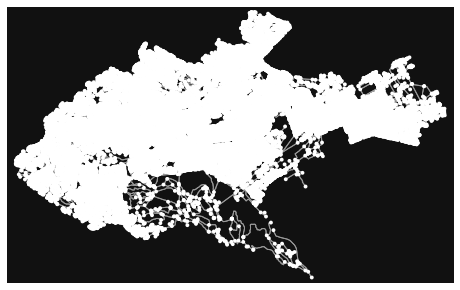

In [10]:
fig, ax = ox.plot_graph(graph) 

#### (C) Extract edges (roads) attributes
To get this data we need to transform the graph of the street network into a GeoDataFrame

Uses the OSMnx package in Python:

- **@module** osmnx.core <br> 
- **@method** graph_to_gdfs()
- **@return** GeoDataFrame

In [11]:
nodes, edges = ox.graph_to_gdfs(graph, nodes = True, edges = True)

In [12]:
# let's look at nodes (intersections) attributes
nodes.head(2)

,y,x,osmid,ref,highway,geometry
29780039,-1.344646,36.914422,29780039,NaN,NaN,POINT (36.91442 -1.34465)
29780051,-1.347919,36.909213,29780051,23-D,motorway_junction,POINT (36.90921 -1.34792)


In [13]:
# let's look at edges (roads) attributes
edges.head(2)

,osmid,oneway,ref,highway,length,geometry,junction,name,maxspeed,lanes,service,access,bridge,tunnel,width,u,v,key
0,4685092,True,B10E,secondary,329.148,"LINESTRING (36.91442 -1.34465, 36.91427 -1.344...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29780039,7181149132,0
1,4962926,True,B10E,secondary,69.913,"LINESTRING (36.91442 -1.34465, 36.91430 -1.344...",roundabout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29780039,30695893,0


In [14]:
# let's look at the geometry of the first road listed
print(edges.geometry[0])

LINESTRING (36.9144219 -1.3446463, 36.914271 -1.3447053, 36.9141296 -1.3447951, 36.9131546 -1.3454943, 36.9120871 -1.346286, 36.9120042 -1.3463459)


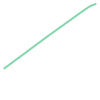

In [15]:
edges.loc[0,'geometry']

``Question:`` What is a linestring? https://automating-gis-processes.github.io/site/2018/notebooks/L1/geometric-objects.html

Note: Check the OSM and OSMnx package documentation for information on attributes information!

#### (D) Summary statistics

In [16]:
# print number of rows in edges (roads)
print("The roads data has", edges.shape[0], "observations", end = ".")

The roads data has 162905 observations.

In [17]:
# print number of edges (roads) by type
print("Printing count of roads by type...\n")
edges['highway'].value_counts()

Printing count of roads by type...



TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


residential                          89916
service                              39652
unclassified                          9185
tertiary                              7170
secondary                             4421
path                                  4364
footway                               2716
track                                 2274
primary                                859
trunk                                  525
cycleway                               495
trunk_link                             201
pedestrian                             198
secondary_link                         197
[residential, path]                    144
primary_link                           112
tertiary_link                           86
[residential, service]                  78
[footway, path]                         52
[residential, footway]                  52
[residential, track]                    28
[service, path]                         26
[service, footway]                      22
[residentia

In [18]:
# print stats on edges (roads) length
length = edges[["length"]]
length.describe()

,length
count,162905.000000
mean,87.027350
std,121.233711
min,0.399000
25%,32.600000
50%,57.309000
75%,103.781000
max,6843.488000


/Users/cilin/software/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/cilin/software/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


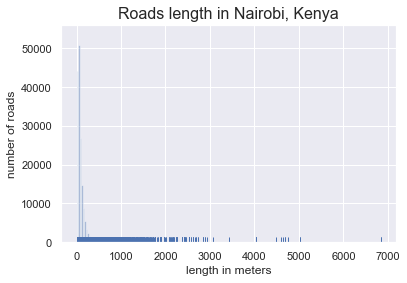

In [19]:
# print histogram of edges (roads) length
sns.set()
sns.set_color_codes()
sns.distplot(length, bins = 200, kde=False, rug = True, color = "b")

plt.title("Roads length in Nairobi, Kenya", fontsize = 16);

# axes
plt.xlabel("length in meters")
plt.ylabel("number of roads");

#### (E) Data preprocessing

##### Compute the centroid_xy point of each road
Notation: (y = lat, x = lon)

**Note**: no need to specify "geometry" for the column name. The centroid and bounds functions are implicitly applied to the "geometry" column

In [20]:
## compute the edges (roads) centroid 
edges_centroid_xy = get_centroid(edges)

# print head of roads_centroid (first 2 rows)
print("Printing head of edges(roads) centroid...\n")
edges_centroid_xy.head(2)

<ipython-input-3-ebe1035aed07>:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for point in data.centroid: #centroid is a method in geopandas


Printing head of edges(roads) centroid...



0     (36.9131986358921, -1.3454718150027507)
1    (36.91419562591316, -1.3444673836092829)
dtype: object

---
### Step 4: Extract spatial info on schools
---
(needed to build the feature matrix for Objective 2)

#### (A) Fetch school network for Nairobi, Kenya

Uses the OSMnx package in Python:<br>

- **@module**: osmnx.pois <br>
- **@method**: pois_from_place()<br>
- **@return**: GeoDataFrame


Use the OSM amenities information:
- https://wiki.openstreetmap.org/wiki/Key:amenity#Education

"school" (includes primary, middle and secondary schools)

In [21]:
schools = ox.pois_from_place(place_name, {'amenity':['school']})# change amenities variable if you want power plants, airports, etc

/Users/cilin/software/anaconda3/lib/python3.8/site-packages/osmnx/pois.py:135: UserWarning: The `pois` module has been deprecated and will be removed in a future release. Use the `geometries` module's `geometries_from_place` function instead.
  warnings.warn(msg)


In [22]:
# print head of schools
schools.head(2)

/Users/cilin/software/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,unique_id,osmid,element_type,amenity,name,geometry,created_by,addr:city,addr:street,accessibility,...,noaddress,roof:colour,roof:levels,roof:shape,addr:housename,description,email,population,service_times,layer
0,node/30092225,30092225,node,school,Kinderworld Academy,POINT (36.82356 -1.31421),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node/30092294,30092294,node,school,Nairobi Academy Secondary,POINT (36.75327 -1.34018),JOSM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note: Check OSM and OSMnx package for a description of school attributes!

In [23]:
# keep only the name and geometry columns (the school data has lots of attributes)
schools = schools[["name", "geometry"]]
type(schools)

/Users/cilin/software/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


geopandas.geodataframe.GeoDataFrame

In [24]:
# print head of schools (first 2 rows)
print("Printing head of schools...\n")
schools.head(4)

Printing head of schools...



,name,geometry
0,Kinderworld Academy,POINT (36.82356 -1.31421)
1,Nairobi Academy Secondary,POINT (36.75327 -1.34018)
2,Consolata School,POINT (36.80406 -1.26749)
3,Aga Khan Nursery,POINT (36.81492 -1.27217)


#### (B) Print school network for Nairobi, Kenya

Uses the OSMnx package in Python:

- **@module** osmnx.plot <br> 
- **@method** gdf_from_place()
- **@return** GeoDataFrame

In [25]:
area = ox.geocode_to_gdf(place_name) 

/Users/cilin/software/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(12.625, 0.5, 'Latitude')

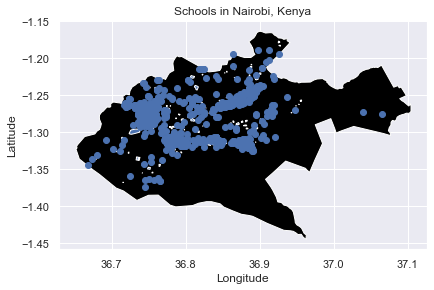

In [26]:
# plot footprint
ax = area.plot(facecolor = "black")

# plot schools
schools.plot(ax = ax, alpha = 1.0) 
plt.tight_layout()

# add title, x,y-labels to graph
plt.title("Schools in Nairobi, Kenya")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

#### (C) Data preprocessing

##### 1. Eliminate schools with N/A names

In [27]:
print("Before cleaning:", schools.shape[0], \
      "observations", end = ".\n")

schools = schools.dropna()

print("After cleaning:", schools.shape[0], \
      "observations", end = ".")

Before cleaning: 1877 observations.
After cleaning: 1848 observations.

/Users/cilin/software/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### 2. Eliminate schools outside the boundary (based on QGIS OSM IDs)

In [28]:
# define schools outside boundary based on OSM IDs
outside_boundary_schools = [
                    1045131871, 1045131916, 1045132244, 1460334555, 166758318, 2108765326, 240567784, 3519412636,
                    416096045, 419031345, 419423629, 419717503, 419821985, 4228290789, 4314055890, 4314130301,
                    4314130302, 4315869357, 4315869365, 4315869370, 4315869376, 4315869377, 4315869381, 4324874603,
                    4324883022, 4324895091, 4326570021, 4379869790, 4759123734, 4809559628, 4810801027, 5063910829,
                    5063910831, 5196737730, 5221207076, 5327794349, 5327794350, 5327912236, 5329734349, 5331561433,
                    5331570283, 5331573169, 5331578567, 5336236341, 5343447771, 540697399, 553583949, 553584168,
                    553602897, 553799062, 553799985, 553801022, 554633619, 584741967, 5922562085, 6116638611,
                    6116638649, 6210202511, 6210202575, 6210202604, 6210240731, 6216321665, 6216321680, 6216407131,
                    6216424333, 6216424337, 6218304899, 6218304911, 6218304919, 6218304920, 6218487554, 6218599558,
                    6249035787, 6249035795, 6249035796, 6249723267, 6251534664, 6251561081, 6257535845, 6257535857,
                    6257554186, 652450311, 659044115, 659862758, 660649622, 660649863, 663479352, 663479353,
                    663560187, 667481477, 667672544, 703087745
                  ]
print(len(outside_boundary_schools), "schools are located outsise Nairobi.")

92 schools are located outsise Nairobi.


/Users/cilin/software/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# eliminate outside boundary schools 
# add all other schools to a list
temp_schools = []
for index, row in schools.iterrows():
    if index in outside_boundary_schools:
        continue
    temp_schools.append(row)  
    
# transform list to GeoDataFrame
schools = gpd.GeoDataFrame(temp_schools)

print("The schools data now has", schools.shape[0], \
      "observations", end = ".")

The schools data now has 1848 observations.

Let's print the school data again.

Text(12.625, 0.5, 'Latitude')

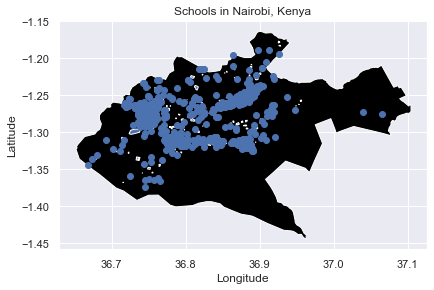

In [30]:
# plot footprint
ax = area.plot(facecolor = "black")

# plot schools
schools.plot(ax = ax, alpha = 1.0) 
plt.tight_layout()

# add title, x,y-labels to graph
plt.title("Schools in Nairobi, Kenya")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

##### 3. Compute the centroid_xy point of each school 
Notation: (x = lon, y = lat)

**Note**: no need to specify "geometry" for the column name. The centroid function is implicitly applied to the "geometry" column

In [31]:
## compute the schools centroid
schools_centroid_xy = get_centroid(schools)

print("Printing head of schools_centroid_xy...\n")
schools_centroid_xy.head(2)

Printing head of schools_centroid_xy...



/Users/cilin/software/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    (36.8235624, -1.3142125)
1    (36.7532749, -1.3401766)
dtype: object

---
### Step 5: Create feature matrix - distance between major roads and school centroids
---
(based on spatial info on major roads and schools)

**Notes**:
    
[1] Geopy can calculate geodesic distance between two points using the geodesic distance. The geodesic distance is the shortest distance on the surface of an ellipsoidal model of the earth. The default algorithm uses the method is given by Karney (2013) (geodesic); this is accurate to round-off and always converges.

[2] We can also use the Great-circle distance (great_circle in geopy); this measure assumes a spherical model of the earth, using the mean earth radius as defined by the International Union of Geodesy and Geophysics

Source: https://geopy.readthedocs.io/en/stable/

#### (A) Compute distance between roads and school centroids

In [32]:
print("Warning: This operation will take a lot of time... about 5 hours")

school_to_roads_temp = get_distance_to_school(schools_centroid_xy, edges_centroid_xy)
school_to_roads = add_row_col_names(schools, edges, school_to_roads_temp, 1)

Processing data...

Distance computed for 500 schools
Processing data...

Distance computed for 1000 schools
Processing data...

Distance computed for 1500 schools
Processing data...


The distance (in km) was computed for 1848 schools.
There are 1848 schools in the data.

Time elapsed: 47341.828 seconds.


``Question:`` Why do you think it takes about 5 hours to compute the distance? Hint: look at the function implementation.

#### (B) Descriptive statistics

In [33]:
print("Printing head of school_to_roads...\n")
school_to_roads.head()

Printing head of school_to_roads...



,school_name,osmid_4685092,osmid_4962926,"osmid_[4685092, 663223989]",osmid_25739466,osmid_4741880,osmid_489432382,osmid_489432383,osmid_989392126,osmid_775253598,...,"osmid_[1003863120, 1003863125]",osmid_1003863124,osmid_1003863126,osmid_1003863126,osmid_1003863122,osmid_1003863126,osmid_1003863126,osmid_1003863124,osmid_1003863126,osmid_1003863126
0,Kinderworld Academy,10.330507,10.413524,9.585346,9.828452,3.554796,3.556404,3.586658,3.605475,3.478003,...,11.471936,11.599002,11.552547,11.664772,11.660710,11.664772,11.713028,11.634851,11.713028,11.624307
1,Nairobi Academy Secondary,17.753745,17.862203,16.920291,17.145400,6.699911,6.715643,6.733129,6.685199,6.677263,...,3.467582,3.611781,3.553272,3.665695,3.683916,3.665695,3.754193,3.679085,3.754193,3.688049
2,Consolata School,13.966338,14.018292,13.352211,13.595830,2.110731,2.094846,2.063001,2.099937,2.172790,...,11.993841,12.145152,12.080331,12.189229,12.221655,12.189229,12.300149,12.228591,12.300149,12.246462
3,Aga Khan Nursery,12.715104,12.764642,12.114142,12.357023,2.447011,2.431413,2.415265,2.463684,2.469337,...,12.599781,12.747564,12.686129,12.797330,12.821665,12.797330,12.895096,12.820995,12.895096,12.832419
4,State House Girls High School,12.977826,13.033181,12.349039,12.593238,1.825035,1.809298,1.792230,1.840440,1.850260,...,11.976622,12.124591,12.062991,12.174110,12.198818,12.174110,12.272509,12.198522,12.272509,12.210288


In [34]:
school_to_roads.shape

/Users/cilin/software/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1848, 162906)

Statistics for each school (describe by line)

In [35]:
stats_each_school_roads = stats_for_each_school(school_to_roads)
print("Printing statistics for each school...\n")
stats_each_school_roads.head()

Printing statistics for each school...



,count,mean,std,min,25%,50%,75%,max
0,162905.0,9.850082,5.783330,0.026047,5.474970,9.046891,12.785515,30.987890
1,162905.0,14.167710,8.052740,0.006992,7.718149,13.023661,19.337366,39.054059
2,162905.0,9.943769,6.414243,0.005082,4.981287,9.293302,12.940647,32.880717
3,162905.0,9.508414,6.082250,0.014473,4.940919,8.667845,12.388804,31.674396
4,162905.0,9.638296,6.247918,0.013476,4.828457,8.916771,12.592242,32.186836


Statistics for each school (describe by column)

In [36]:
stats_all_school_roads = stats_for_all_schools(stats_each_school_roads)
print("Printing statistics for all schools...\n")
stats_all_school_roads

Printing statistics for all schools...



/Users/cilin/software/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,mean,std,min,25%,50%,75%,max
count,1848.0,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000
mean,162905.0,10.952650,6.542517,0.031073,5.856349,9.818386,14.787795,32.125026
std,0.0,1.903470,1.172483,0.021510,1.028925,2.032867,2.682678,5.343876
min,162905.0,8.971735,5.116881,0.000922,4.662180,7.578875,11.770764,25.032330
25%,162905.0,9.288381,5.372957,0.015495,5.162295,8.029085,12.450819,26.788939
50%,162905.0,10.639546,6.468531,0.026569,5.607246,9.622944,14.160066,32.628714
75%,162905.0,11.818206,7.472990,0.041630,6.227021,10.482715,16.216107,36.294144
max,162905.0,23.700422,9.662898,0.159556,17.775192,23.580751,30.834545,48.500537


### Breakout room exercise
 - implement the get_distance_to_school() function in an efficient way.
 - play with different countries (states if US), cities, counties etc. Hint: change place_name variable here: place_name = "Nairobi, Kenya", graph = ox.graph_from_place(place_name, network_type = "all_private").
 - play with different major sources of pollution (e.g., airports, power plants, etc.). Hint: change amenities attribute here: ox.pois_from_place(place_name, amenities=['school']).